# Model Visualization

This notebook visualizes and inspects all trained model files (.pkl) in the ML models directory.


In [1]:
import pickle
import json
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
BASE_DIR = Path('../')
MODELS_DIR = BASE_DIR / 'models'

print(f"Models directory: {MODELS_DIR}")
print(f"\nAvailable model directories:")
for model_dir in sorted(MODELS_DIR.iterdir()):
    if model_dir.is_dir() and model_dir.name != '__pycache__':
        pkl_files = list(model_dir.glob('*.pkl'))
        if pkl_files:
            print(f"  - {model_dir.name}: {len(pkl_files)} .pkl file(s)")


Models directory: ../models

Available model directories:
  - document_classifier: 2 .pkl file(s)
  - entity_extractor: 1 .pkl file(s)
  - invoice_extractor: 1 .pkl file(s)
  - sentiment_analyzer: 2 .pkl file(s)


## 1. Document Classifier


Document Classifier Model



✓ Model loaded successfully!

Model Type: MultinomialNB
Vectorizer Type: TfidfVectorizer

Metadata:
  accuracy: 1.0
  model_file: model.pkl
  vectorizer_file: vectorizer.pkl

Model Classes: ['delivery_order' 'invoice' 'purchase_order' 'quotation' 'receipt']
Number of Features: 156

Top Features per Class


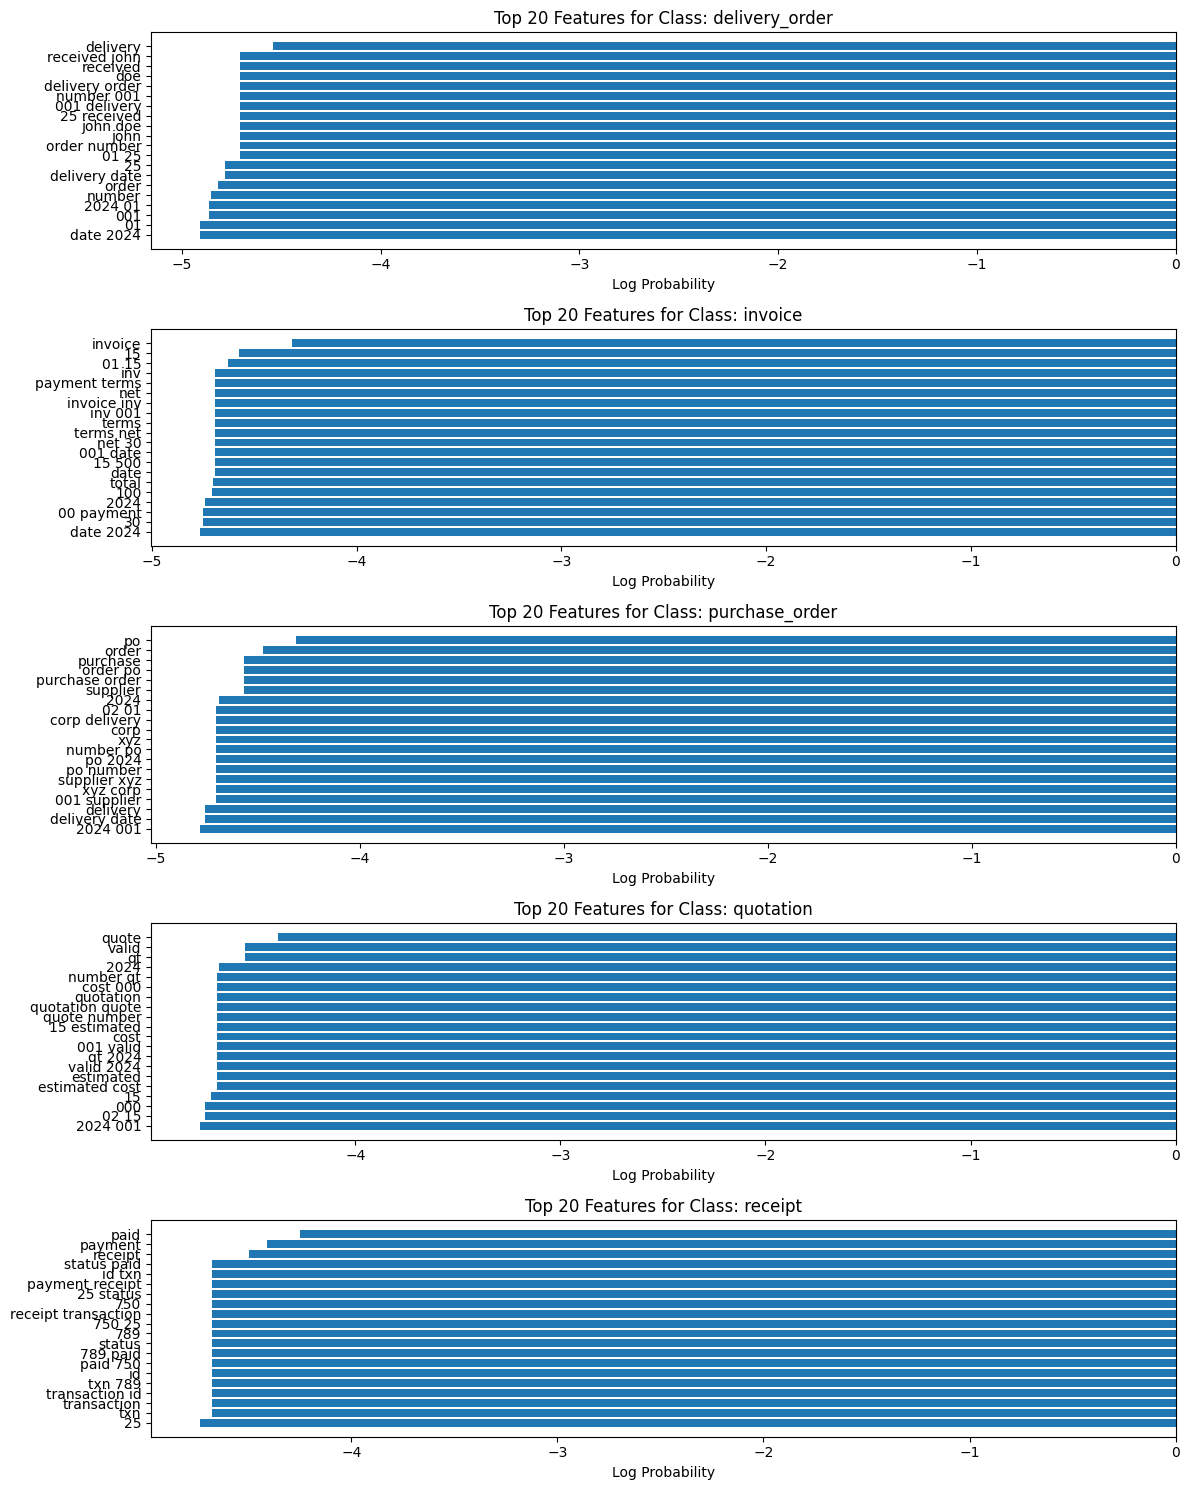


Class Prior Probabilities


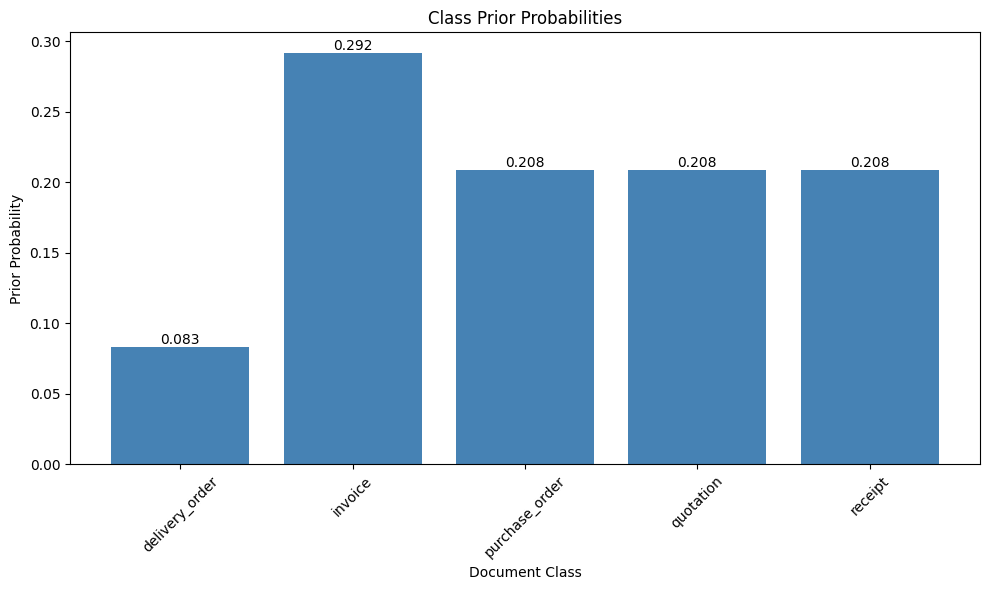


✓ Visualizations saved to ../models/document_classifier


In [2]:
doc_classifier_dir = MODELS_DIR / 'document_classifier'

print("=" * 60)
print("Document Classifier Model")
print("=" * 60)

# Load model files
try:
    with open(doc_classifier_dir / 'model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open(doc_classifier_dir / 'vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    
    with open(doc_classifier_dir / 'metadata.json', 'r') as f:
        metadata = json.load(f)
    
    print(f"\n✓ Model loaded successfully!")
    print(f"\nModel Type: {type(model).__name__}")
    print(f"Vectorizer Type: {type(vectorizer).__name__}")
    print(f"\nMetadata:")
    for key, value in metadata.items():
        print(f"  {key}: {value}")
    
    print(f"\nModel Classes: {model.classes_}")
    print(f"Number of Features: {len(vectorizer.get_feature_names_out())}")
    
    # Get feature importance (top features per class)
    print(f"\n" + "=" * 60)
    print("Top Features per Class")
    print("=" * 60)
    
    feature_names = vectorizer.get_feature_names_out()
    feature_log_probs = model.feature_log_prob_  # Shape: (n_classes, n_features)
    
    fig, axes = plt.subplots(len(model.classes_), 1, figsize=(12, 3 * len(model.classes_)))
    if len(model.classes_) == 1:
        axes = [axes]
    
    for idx, class_name in enumerate(model.classes_):
        # Get top 20 features for this class
        top_indices = np.argsort(feature_log_probs[idx])[-20:][::-1]
        top_features = feature_names[top_indices]
        top_scores = feature_log_probs[idx][top_indices]
        
        axes[idx].barh(range(len(top_features)), top_scores)
        axes[idx].set_yticks(range(len(top_features)))
        axes[idx].set_yticklabels(top_features)
        axes[idx].set_xlabel('Log Probability')
        axes[idx].set_title(f'Top 20 Features for Class: {class_name}')
        axes[idx].invert_yaxis()
    
    plt.tight_layout()
    plt.savefig(doc_classifier_dir / 'feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Class probabilities distribution
    print(f"\n" + "=" * 60)
    print("Class Prior Probabilities")
    print("=" * 60)
    
    class_probs = np.exp(model.class_log_prior_)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(model.classes_, class_probs, color='steelblue')
    plt.xlabel('Document Class')
    plt.ylabel('Prior Probability')
    plt.title('Class Prior Probabilities')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, prob in zip(bars, class_probs):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.3f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(doc_classifier_dir / 'class_priors.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Visualizations saved to {doc_classifier_dir}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Model files not found. Please run the document classification notebook first.")


## 2. Sentiment Analyzer


Sentiment Analyzer Model

✓ Model loaded successfully!

Model Type: MultinomialNB
Vectorizer Type: TfidfVectorizer

Metadata:
  accuracy: 0.0
  model_file: model.pkl
  vectorizer_file: vectorizer.pkl

Model Classes: ['negative' 'neutral' 'positive']


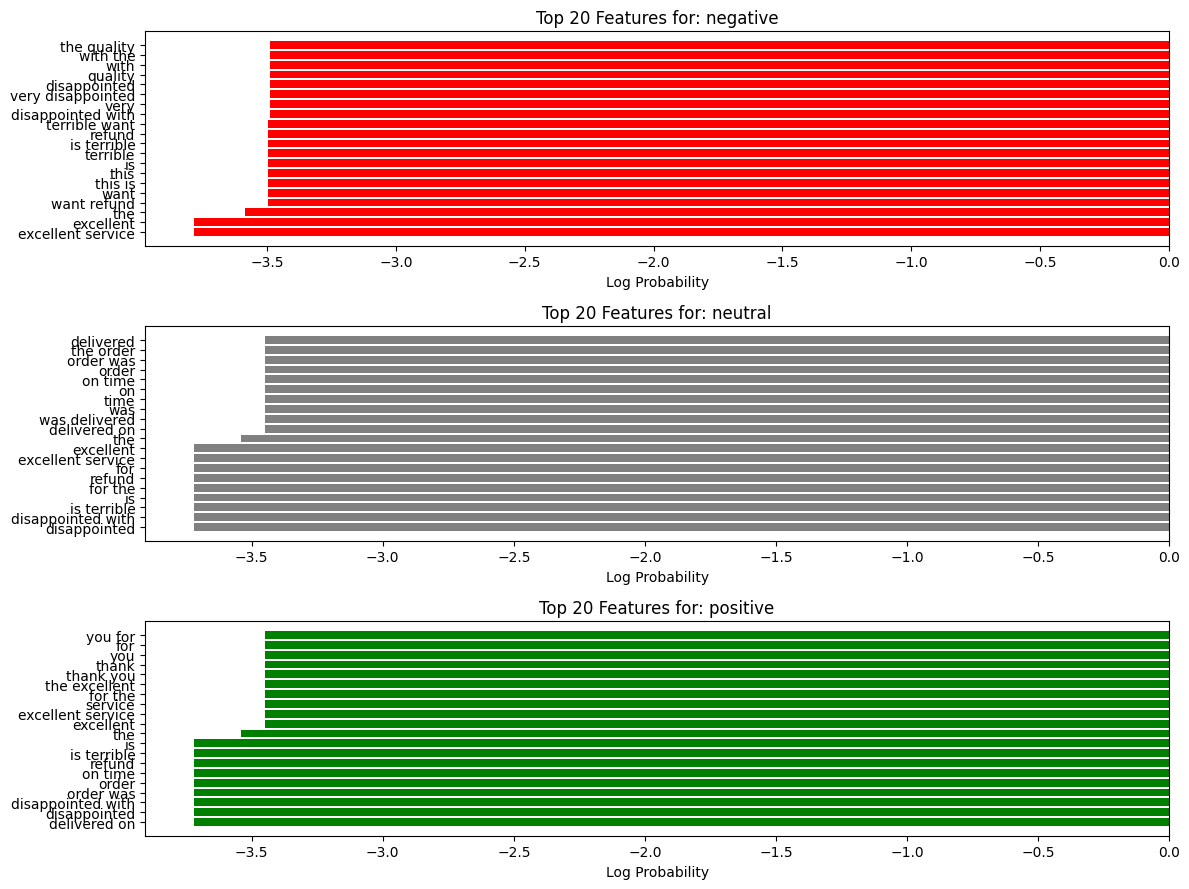

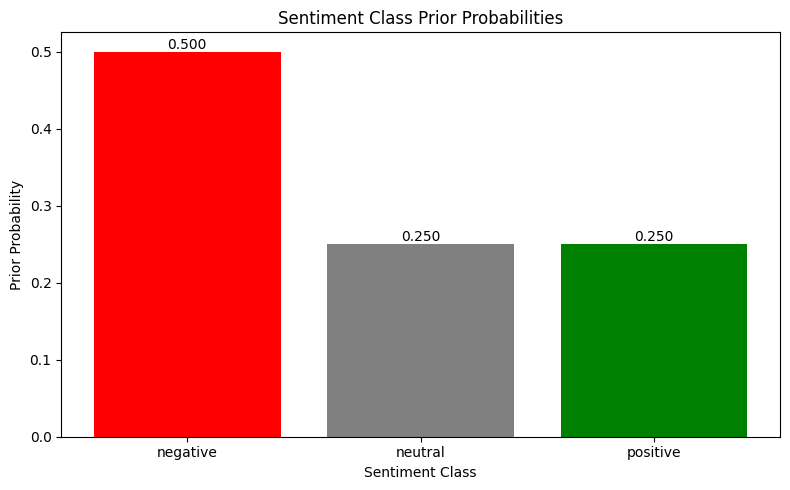


✓ Visualizations saved to ../models/sentiment_analyzer


In [3]:
sentiment_dir = MODELS_DIR / 'sentiment_analyzer'

print("=" * 60)
print("Sentiment Analyzer Model")
print("=" * 60)

try:
    with open(sentiment_dir / 'model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open(sentiment_dir / 'vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    
    with open(sentiment_dir / 'metadata.json', 'r') as f:
        metadata = json.load(f)
    
    print(f"\n✓ Model loaded successfully!")
    print(f"\nModel Type: {type(model).__name__}")
    print(f"Vectorizer Type: {type(vectorizer).__name__}")
    print(f"\nMetadata:")
    for key, value in metadata.items():
        print(f"  {key}: {value}")
    
    print(f"\nModel Classes: {model.classes_}")
    
    # Feature importance visualization
    feature_names = vectorizer.get_feature_names_out()
    feature_log_probs = model.feature_log_prob_
    
    fig, axes = plt.subplots(len(model.classes_), 1, figsize=(12, 3 * len(model.classes_)))
    if len(model.classes_) == 1:
        axes = [axes]
    
    for idx, class_name in enumerate(model.classes_):
        top_indices = np.argsort(feature_log_probs[idx])[-20:][::-1]
        top_features = feature_names[top_indices]
        top_scores = feature_log_probs[idx][top_indices]
        
        color = 'green' if 'positive' in class_name.lower() else 'red' if 'negative' in class_name.lower() else 'gray'
        axes[idx].barh(range(len(top_features)), top_scores, color=color)
        axes[idx].set_yticks(range(len(top_features)))
        axes[idx].set_yticklabels(top_features)
        axes[idx].set_xlabel('Log Probability')
        axes[idx].set_title(f'Top 20 Features for: {class_name}')
        axes[idx].invert_yaxis()
    
    plt.tight_layout()
    plt.savefig(sentiment_dir / 'feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Class priors
    class_probs = np.exp(model.class_log_prior_)
    plt.figure(figsize=(8, 5))
    colors = ['green' if 'positive' in c.lower() else 'red' if 'negative' in c.lower() else 'gray' for c in model.classes_]
    bars = plt.bar(model.classes_, class_probs, color=colors)
    plt.xlabel('Sentiment Class')
    plt.ylabel('Prior Probability')
    plt.title('Sentiment Class Prior Probabilities')
    
    for bar, prob in zip(bars, class_probs):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.3f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(sentiment_dir / 'class_priors.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Visualizations saved to {sentiment_dir}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Model files not found.")


## 3. Entity Extractor


Entity Extractor

✓ Extractor loaded successfully!

Extractor Type: function

Test Extraction

Input Text:
Invoice #INV-001
Date: 2024-01-15
Amount: $1,500.00
Email: contact@company.com
Phone: 555-1234

Extracted Entities:
  invoice_numbers: ['INV-001']
  amounts: ['$1,500.00']
  dates: ['2024-01-15']
  emails: ['contact@company.com']


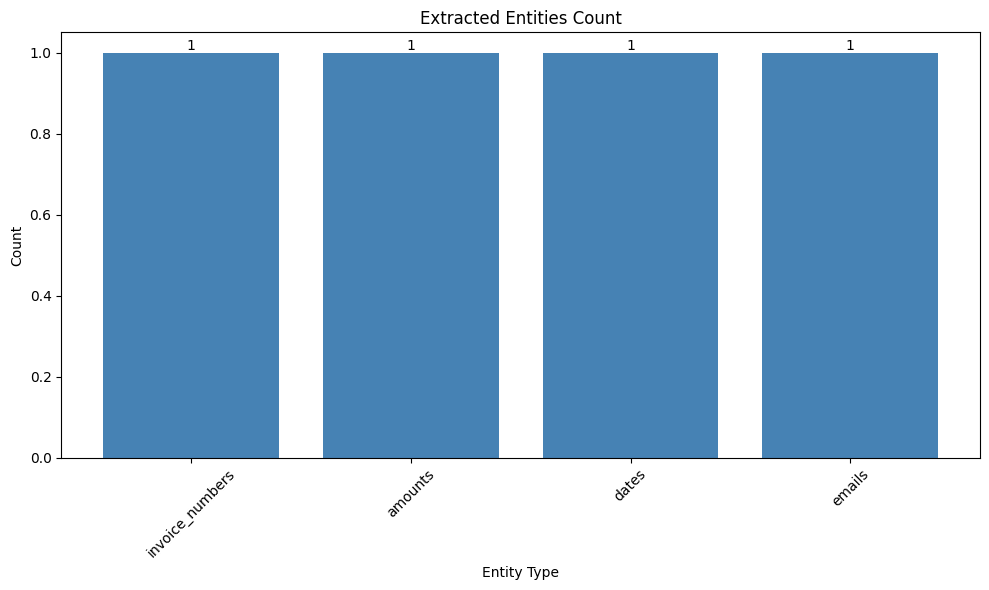


✓ Visualization saved to ../models/entity_extractor


In [4]:
entity_dir = MODELS_DIR / 'entity_extractor'

print("=" * 60)
print("Entity Extractor")
print("=" * 60)

# Define the function first (needed for pickle to load)
import re
from typing import Dict, List

def extract_entities_rule_based(text: str) -> Dict[str, List[str]]:
    """Extract entities using regex patterns"""
    entities = {
        'invoice_numbers': re.findall(r'(?:invoice|inv)[\s#:]*([A-Z0-9\-]+)', text, re.IGNORECASE),
        'po_numbers': re.findall(r'(?:po|purchase\s*order)[\s#:]*([A-Z0-9\-]+)', text, re.IGNORECASE),
        'amounts': re.findall(r'\$[\d,]+\.?\d*', text),
        'dates': re.findall(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{4}[/-]\d{1,2}[/-]\d{1,2}', text),
        'emails': re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text),
        'phones': re.findall(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', text),
        'tax_ids': re.findall(r'(?:tax\s*id|ein|vat)[\s#:]*([A-Z0-9\-]+)', text, re.IGNORECASE),
    }
    return {k: v for k, v in entities.items() if v}

try:
    with open(entity_dir / 'rule_based_extractor.pkl', 'rb') as f:
        extractor = pickle.load(f)
    
    print(f"\n✓ Extractor loaded successfully!")
    print(f"\nExtractor Type: {type(extractor).__name__}")
    
    # Test the extractor
    test_text = "Invoice #INV-001\nDate: 2024-01-15\nAmount: $1,500.00\nEmail: contact@company.com\nPhone: 555-1234"
    
    print(f"\n" + "=" * 60)
    print("Test Extraction")
    print("=" * 60)
    print(f"\nInput Text:")
    print(test_text)
    
    extracted = extractor(test_text)
    
    print(f"\nExtracted Entities:")
    for entity_type, values in extracted.items():
        print(f"  {entity_type}: {values}")
    
    # Visualize entity types found
    if extracted:
        entity_types = list(extracted.keys())
        entity_counts = [len(extracted[et]) for et in entity_types]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(entity_types, entity_counts, color='steelblue')
        plt.xlabel('Entity Type')
        plt.ylabel('Count')
        plt.title('Extracted Entities Count')
        plt.xticks(rotation=45)
        
        for bar, count in zip(bars, entity_counts):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{count}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig(entity_dir / 'entity_extraction_demo.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"\n✓ Visualization saved to {entity_dir}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Extractor file not found.")


## 4. Invoice Extractor


Invoice Extractor

✓ Extractor loaded successfully!

Extractor Type: function

Test Extraction

Input Invoice:
INVOICE
Invoice Number: INV-2024-001
Date: January 15, 2024
Due Date: February 14, 2024

Bill To:
ABC Company
123 Main Street

Subtotal: $650.00
Tax (10%): $65.00
Total: $715.00

Payment Terms: Net 30

Extracted Invoice Data:
{
  "invoice_number": "INV-2024-001",
  "invoice_date": "January 15, 2024",
  "due_date": "February 14, 2024",
  "vendor_name": null,
  "customer_name": null,
  "subtotal": 650.0,
  "tax": null,
  "total": 650.0,
  "payment_terms": "Net 30",
  "line_items": []
}


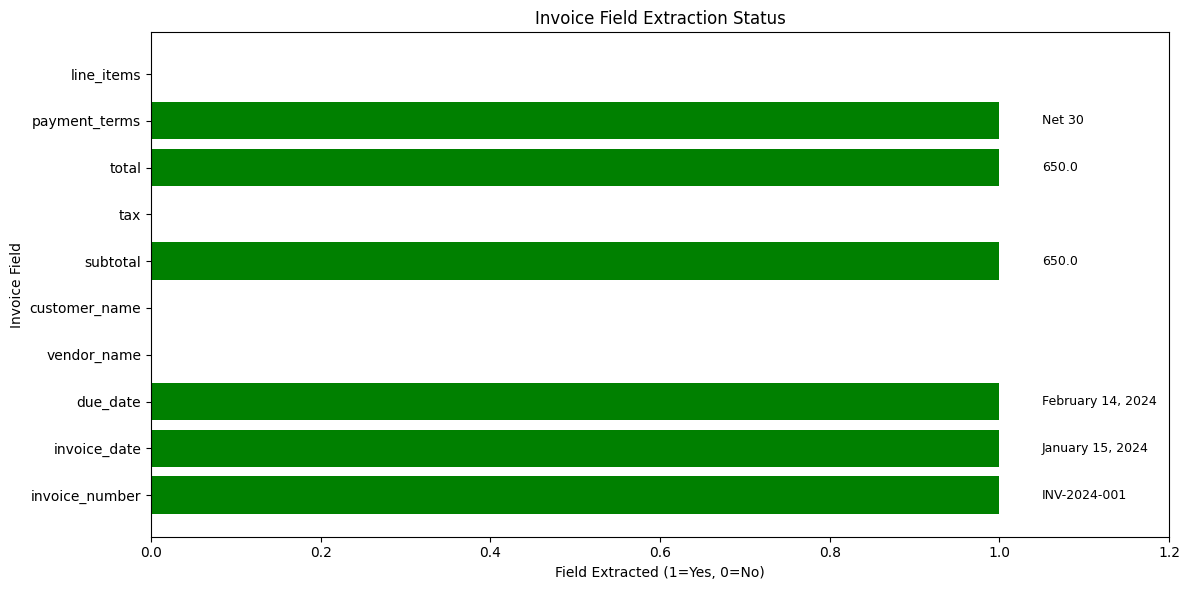


✓ Visualization saved to ../models/invoice_extractor


In [5]:
invoice_dir = MODELS_DIR / 'invoice_extractor'

print("=" * 60)
print("Invoice Extractor")
print("=" * 60)

# Define the function first (needed for pickle to load)
def extract_invoice_data(text: str) -> dict:
    """Extract structured data from invoice text"""
    result = {
        'invoice_number': None,
        'invoice_date': None,
        'due_date': None,
        'vendor_name': None,
        'customer_name': None,
        'subtotal': None,
        'tax': None,
        'total': None,
        'payment_terms': None,
        'line_items': []
    }
    
    # Extract invoice number
    inv_match = re.search(r'invoice\s*(?:number|#|no\.?)[\s:]*([A-Z0-9\-]+)', text, re.IGNORECASE)
    if inv_match:
        result['invoice_number'] = inv_match.group(1)
    
    # Extract dates
    dates = re.findall(r'(\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\w+\s+\d{1,2},?\s+\d{4})', text)
    if dates:
        result['invoice_date'] = dates[0]
        if len(dates) > 1:
            result['due_date'] = dates[1]
    
    # Extract amounts
    subtotal_match = re.search(r'subtotal[\s:]*\$?([\d,]+\.?\d*)', text, re.IGNORECASE)
    tax_match = re.search(r'tax[\s:]*\$?([\d,]+\.?\d*)', text, re.IGNORECASE)
    total_match = re.search(r'total[\s:]*\$?([\d,]+\.?\d*)', text, re.IGNORECASE)
    
    if subtotal_match:
        result['subtotal'] = float(subtotal_match.group(1).replace(',', ''))
    if tax_match:
        result['tax'] = float(tax_match.group(1).replace(',', ''))
    if total_match:
        result['total'] = float(total_match.group(1).replace(',', ''))
    
    # Extract payment terms
    terms_match = re.search(r'payment\s*terms?[\s:]*([^\n]+)', text, re.IGNORECASE)
    if terms_match:
        result['payment_terms'] = terms_match.group(1).strip()
    
    return result

try:
    with open(invoice_dir / 'invoice_extractor.pkl', 'rb') as f:
        extractor = pickle.load(f)
    
    print(f"\n✓ Extractor loaded successfully!")
    print(f"\nExtractor Type: {type(extractor).__name__}")
    
    # Test the extractor
    test_invoice = """INVOICE
Invoice Number: INV-2024-001
Date: January 15, 2024
Due Date: February 14, 2024

Bill To:
ABC Company
123 Main Street

Subtotal: $650.00
Tax (10%): $65.00
Total: $715.00

Payment Terms: Net 30"""
    
    print(f"\n" + "=" * 60)
    print("Test Extraction")
    print("=" * 60)
    print(f"\nInput Invoice:")
    print(test_invoice)
    
    extracted = extractor(test_invoice)
    
    print(f"\nExtracted Invoice Data:")
    print(json.dumps(extracted, indent=2, default=str))
    
    # Visualize extracted fields
    fields = list(extracted.keys())
    has_value = [1 if extracted[f] is not None and extracted[f] != [] else 0 for f in fields]
    
    plt.figure(figsize=(12, 6))
    colors = ['green' if v else 'lightgray' for v in has_value]
    bars = plt.barh(fields, has_value, color=colors)
    plt.xlabel('Field Extracted (1=Yes, 0=No)')
    plt.ylabel('Invoice Field')
    plt.title('Invoice Field Extraction Status')
    plt.xlim(0, 1.2)
    
    for i, (bar, field) in enumerate(zip(bars, fields)):
        value = extracted[field]
        if value is not None and value != []:
            label = str(value)[:30] + '...' if len(str(value)) > 30 else str(value)
            plt.text(1.05, bar.get_y() + bar.get_height()/2,
                    label,
                    va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(invoice_dir / 'invoice_extraction_demo.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Visualization saved to {invoice_dir}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Extractor file not found.")
